In [69]:
import json

f= open("data.json")
f2 = open("serie2.json")
data = json.load(f) + json.load(f2)
f.close()
f2.close()

In [70]:
import pandas as pd

df = pd.DataFrame(data)

In [71]:
[ d['email'] for d in data]
df['email'] # Serie
df[['email', 'age']] # DataFrame

import re

def transform(e):
    return re.sub('[^\d+]+','.', e)

df['new_phone'] = df['phone'].map(transform)
# df['new_phone'] = df['phone'].map(lambda x:x[2:])


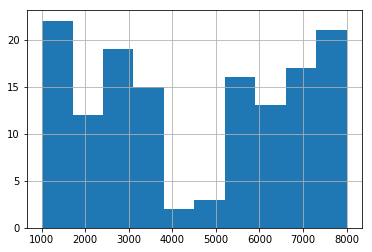

In [72]:
def convert(e):
    return float(re.sub('[\$,]+','', e))

df['balance_float'] = df['balance'].map(convert)
df['balance_float'].hist()

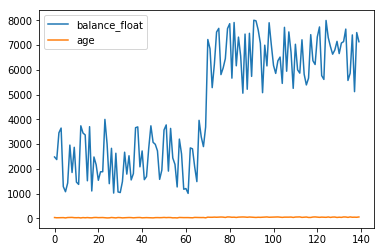

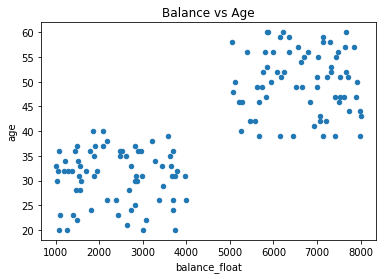

In [73]:
df[['balance_float', 'age']].plot()
df.plot.scatter('balance_float', 'age', title="Balance vs Age")


In [74]:
def ma_lambda(x):
    if x == "female":
        return "b"
    else:
        return "f"

color = df["gender"].map(lambda x:('#F57C00' if x=='female' else '#4527A0'))

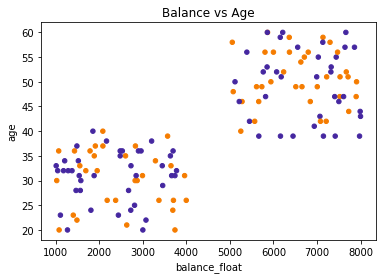

In [75]:
df.plot.scatter('balance_float', 'age', title="Balance vs Age", color=color)

In [77]:
from sklearn.mixture import GaussianMixture

In [84]:
gmm = GaussianMixture(n_components=4, covariance_type='diag')

res = gmm.fit(df[['balance_float','age']])

In [85]:
print(res.means_)
print(res.weights_)
print(res.covariances_)

[[7357.87446875   49.52045539]
 [3094.51664956   30.41273214]
 [5853.92860482   50.63468094]
 [1526.86334534   31.1785126 ]]
[0.26553856 0.27506909 0.2344571  0.22493525]
[[1.58002156e+05 3.79547133e+01]
 [2.83605731e+05 2.92280351e+01]
 [2.19900285e+05 4.16218733e+01]
 [1.24787609e+05 2.94438550e+01]]


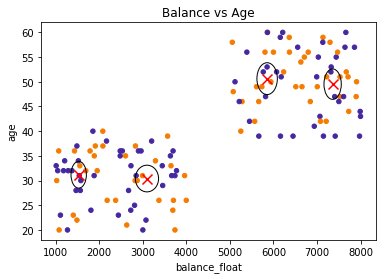

In [112]:
import numpy as np
from matplotlib.patches import Ellipse

fig = df.plot.scatter('balance_float', 'age', title="Balance vs Age", color=color)
fig.scatter(np.array(res.means_)[:,0],np.array(res.means_)[:,1], color='r', s=100, marker="x")
for pt, cov in zip(res.means_, res.covariances_):
    fig.add_artist(Ellipse(pt, np.sqrt(cov[0]), np.sqrt(cov[1]), fill=None))

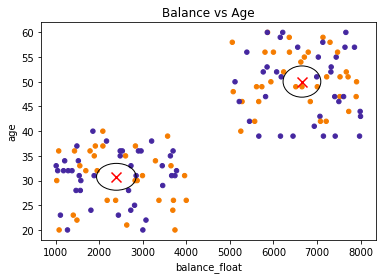

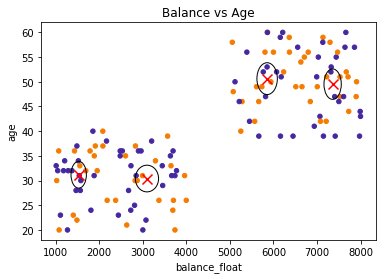

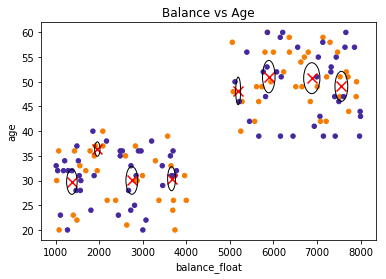

In [113]:
for comp in [2, 4, 8]:
    gmm = GaussianMixture(n_components=comp, covariance_type='diag')
    res = gmm.fit(df[['balance_float','age']])
    fig = df.plot.scatter('balance_float', 'age', title="Balance vs Age", color=color)
    fig.scatter(np.array(res.means_)[:,0],np.array(res.means_)[:,1], color='r', s=100, marker="x")
    for pt, cov in zip(res.means_, res.covariances_):
        fig.add_artist(Ellipse(pt, np.sqrt(cov[0]), np.sqrt(cov[1]), fill=None))

In [132]:
# items

In [146]:
with open("product.json") as f:
    produit = json.load(f)

items = pd.DataFrame(produit)

def mapper(e):
    return df.iloc[e]['_id']

items['owner'] = items['owner'].map(lambda x:df.iloc[x]['_id'])

items

,_id,company,description,owner,picture
0,5ca5f8dec0699cea488ca2f9,COSMETEX,Incididunt enim ut qui quis do Lorem ullamco p...,5ca5cb963ff78419c778f92c,http://placehold.it/32x32
1,5ca5f8dea3689e6d7062d0ff,EXOTECHNO,In deserunt aliquip reprehenderit fugiat paria...,5ca5cb9611527cdee81853fe,http://placehold.it/32x32
2,5ca5f8de8994546e9c18e071,GLUID,Lorem enim nisi aliqua dolore ipsum est tempor...,5ca5cb9611527cdee81853fe,http://placehold.it/32x32
3,5ca5f8de55f5e3aaae52c2c3,ORBIFLEX,Aliqua incididunt non est deserunt tempor inci...,5ca5cb963a719dc472be9dab,http://placehold.it/32x32
4,5ca5f8dede4486f68da450ba,REALMO,Fugiat adipisicing ad laboris deserunt sint mi...,5ca5cb96ea3ec9a48d159a4f,http://placehold.it/32x32
5,5ca5f8deb6bb81685b6aebda,PROTODYNE,Dolore dolore excepteur quis excepteur id esse...,5ca5cb962693602eca374194,http://placehold.it/32x32
6,5ca5f8decb43362cd8a039cd,FILODYNE,Do amet duis cupidatat cupidatat. Eiusmod null...,5ca5cb965afcd5c6c333e374,http://placehold.it/32x32
7,5ca5f8def5293cab808a4fe6,FURNAFIX,Cupidatat proident laborum nulla qui tempor. E...,5ca5cb967516f903ded6b70d,http://placehold.it/32x32
8,5ca5f8dee82800ad671a4a0d,COMTRAK,Sunt deserunt deserunt elit consectetur aliqua...,5ca5cb965afcd5c6c333e374,http://placehold.it/32x32
9,5ca5f8deaa2ff9e1702d3832,PODUNK,Elit culpa deserunt cillum velit. Proident nos...,5ca5cb96ea3ec9a48d159a4f,http://placehold.it/32x32


In [135]:
"""
Rappel sur les fonctions
"""

a = {'exemple': 4}

def change(var):
    var['exemple'] = 5
    
change(a)

print(a)

{'exemple': 5}


In [171]:
items['description']=items['description'].map(lambda x:re.sub('[\n\r]', '', x))

result = df.set_index('_id').join(items.set_index('owner'), lsuffix='_owner', rsuffix='_product')
result.to_csv("product_user.csv")

In [163]:
df1 = pd.DataFrame({'id':[0,1,2], 'name': ['Martin', 'Jil', 'Noemie'], 'age': [42,36,28]})
df2 = pd.DataFrame({
    'title': ['Marteau', 'Planche', 'Bières'], 
    'prix': [8,4,6],
    'owner': [0,0,2]
})
print('left : Default')
print(df1.set_index('id').join(df2.set_index('owner'), how="left"))
print('---')
print('right : Default')
print(df1.set_index('id').join(df2.set_index('owner'), how="right"))
print('---')
print('inner : Default')
print(df1.set_index('id').join(df2.set_index('owner'), how="inner"))
print('---')
print('outer : Default')
print(df1.set_index('id').join(df2.set_index('owner'), how="outer"))



left : Default
     name  age    title  prix
0  Martin   42  Marteau   8.0
0  Martin   42  Planche   4.0
1     Jil   36      NaN   NaN
2  Noemie   28   Bières   6.0
---
right : Default
     name  age    title  prix
0  Martin   42  Marteau     8
0  Martin   42  Planche     4
2  Noemie   28   Bières     6
---
inner : Default
     name  age    title  prix
0  Martin   42  Marteau     8
0  Martin   42  Planche     4
2  Noemie   28   Bières     6
---
outer : Default
     name  age    title  prix
0  Martin   42  Marteau   8.0
0  Martin   42  Planche   4.0
1     Jil   36      NaN   NaN
2  Noemie   28   Bières   6.0


In [183]:
import numpy as np



print(liste)

def squares(n,i):
    k = n-i
    if k == n:
        return 1
    else:
        return squares(n-k, n)+1
    
def sum_of_squares(n):
    # put your code here...
    liste = [i**2 for i in range(int(np.sqrt(18))+1)]
    res = []
    for e in liste:
        res.append(squares(n,e))
    return res
    
sum_of_squares(18)




[0, 1, 4, 9, 16]


RecursionError: maximum recursion depth exceeded in comparison

In [187]:
def maxSequenceOf(arr, size):
    total = 0
    for i in range(len(arr)-size):
        s = sum(arr[i:i+size])
        if s > total:
            total = s
    return total
    
def maxSequence(arr):
	# ... 
    print(max([maxSequenceOf(arr,i) for i in range(len(arr))]))
    return max([maxSequenceOf(arr,i) for i in range(len(arr))])  

maxSequence([-2, 1, -3, 4, -1, 2, 1, -5, 4])

6


6